<h1><center> Визуализация №4 </center></h1>

<h2><center> Зависимость силы от позиции на поле </center></h2>

### Инструменты

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Датасет

Импорт данных.

In [45]:
df = pd.read_csv("data/CompleteDataset.csv", low_memory=False)
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для анализа выберем 2 столбца.

In [46]:
df = df[["Strength", "Preferred Positions"]]
df["Preferred Positions"] = df["Preferred Positions"].str.slice(stop=-1)
df.head()

,Strength,Preferred Positions
0,80,ST LW
1,59,RW
2,53,LW
3,80,ST
4,83,GK


Однако большинство игроков имеют несколько позиций, записанных в одну строчку.

In [47]:
df["Preferred Positions"].unique().shape

(802,)

Каждую строку с $K$ значений позиций преобразуем в $K$ строк с одним значением позиции.

In [48]:
reshaped = (
    df.set_index(df.columns.drop('Preferred Positions',1).tolist())["Preferred Positions"]
    .str.split(' ', expand=True)
    .stack()
    .reset_index()
    .rename(columns={0:'Preferred Positions'})
    .loc[:, df.columns]
)

Преобразуем значения силы, типа: "A+B" в одно числовое значение.

In [49]:
def toint(x):
    if x.find("+") > 0:
        nums = x.split("+")
        return int(nums[0]) + int(nums[1])
    if x.find("-") > 0:
        nums = x.split("-")
        return int(nums[0]) - int(nums[1])
    return int(x)
        

reshaped["Strength"] = reshaped["Strength"].apply(toint)

In [50]:
reshaped["Preferred Positions"].unique().shape

(15,)

### Визуализация

Посмотрим как распределены значения силы в зависимости от позиции.

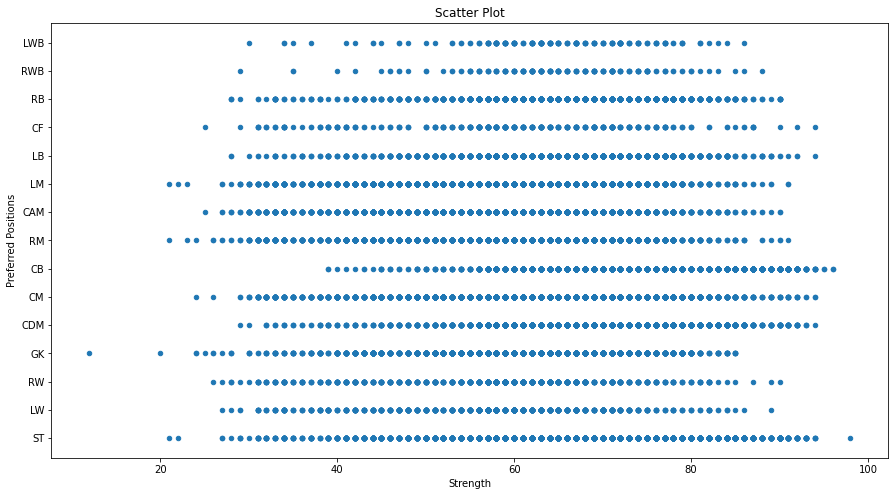

In [51]:
reshaped.plot.scatter(y = "Preferred Positions", x = "Strength", figsize = (15, 8))
plt.title("Scatter Plot")
None

Однако для большей информативности, посмотрим как влияет позиция в среднем на значение силы и что позволит нам определить самые силовые позиции в футболе.

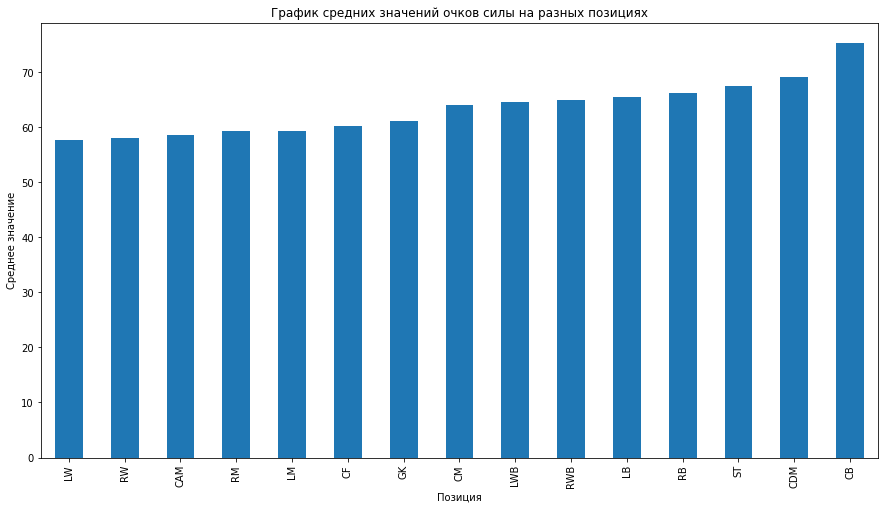

In [52]:
reshaped.groupby("Preferred Positions")["Strength"].mean().sort_values().plot.bar(figsize=(15, 8))
plt.title("График средних значений очков силы на разных позициях")
plt.ylabel("Среднее значение")
plt.xlabel("Позиция")
None

Как видим, позиции крайних атакующих защитников являются наименее силовыми, поскольку требуют высокой скорости, когда как позиции центральных оборонительных игроков являются наиболее требовательными к силе.